In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 [=====>........................] - ETA: 1s - loss: 1.4390 - accuracy: 0.2344
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 1s 79ms/step - loss: 1.3877 - accuracy: 0.3086 - val_loss: 1.3191 - val_accuracy: 0.4171
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3730 - accuracy: 0.3438
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 1.3484 - accuracy: 0.3390 - val_loss: 1.3073 - val_accuracy: 0.4000
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3202 - accuracy: 0.3750
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 27ms/step - loss: 1.3363 - accuracy: 0.3448 - val_loss: 1.2980 - val_accuracy: 0.4171
Epoch 4/1000
1/5 [=====>........................] - ETA: 0s - loss: 1.3175 - accuracy: 0.3438
Epoch 4: sav

5/5 [==============================] - 0s 21ms/step - loss: 0.8937 - accuracy: 0.6381 - val_loss: 0.7893 - val_accuracy: 0.7657
Epoch 29/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8010 - accuracy: 0.7188
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.8679 - accuracy: 0.6686 - val_loss: 0.7642 - val_accuracy: 0.8000
Epoch 30/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.7997 - accuracy: 0.7422
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 0.8620 - accuracy: 0.6857 - val_loss: 0.7363 - val_accuracy: 0.8057
Epoch 31/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.8111 - accuracy: 0.7031
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 0.8318 - accuracy: 0.6800 - val_loss: 0.

Epoch 56/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5862 - accuracy: 0.8203
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 0.5629 - accuracy: 0.8019 - val_loss: 0.3546 - val_accuracy: 0.9143
Epoch 57/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.7891
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 22ms/step - loss: 0.5390 - accuracy: 0.7924 - val_loss: 0.3464 - val_accuracy: 0.9143
Epoch 58/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.7969
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 20ms/step - loss: 0.5709 - accuracy: 0.7867 - val_loss: 0.3366 - val_accuracy: 0.9257
Epoch 59/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.8125
Epoch

1/5 [=====>........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8672
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.4420 - accuracy: 0.8362 - val_loss: 0.2369 - val_accuracy: 0.9486
Epoch 84/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4724 - accuracy: 0.8203
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 0.4729 - accuracy: 0.8324 - val_loss: 0.2338 - val_accuracy: 0.9486
Epoch 85/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.8281
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 0.4784 - accuracy: 0.8362 - val_loss: 0.2334 - val_accuracy: 0.9486
Epoch 86/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8438
Epoch 86: saving mo

1/5 [=====>........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.8594
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 0.4103 - accuracy: 0.8514 - val_loss: 0.1954 - val_accuracy: 0.9543
Epoch 111/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8516
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 0.4001 - accuracy: 0.8495 - val_loss: 0.1913 - val_accuracy: 0.9543
Epoch 112/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.8594
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 0.3937 - accuracy: 0.8667 - val_loss: 0.1917 - val_accuracy: 0.9486
Epoch 113/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8281
Epoch 113: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.8906
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 20ms/step - loss: 0.3870 - accuracy: 0.8724 - val_loss: 0.1588 - val_accuracy: 0.9600
Epoch 138/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8047
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 20ms/step - loss: 0.3405 - accuracy: 0.8895 - val_loss: 0.1596 - val_accuracy: 0.9657
Epoch 139/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8906
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 0.3213 - accuracy: 0.9029 - val_loss: 0.1591 - val_accuracy: 0.9657
Epoch 140/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8672
Epoch 140: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8672
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 0.3676 - accuracy: 0.8571 - val_loss: 0.1367 - val_accuracy: 0.9714
Epoch 165/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.9219
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.3248 - accuracy: 0.8933 - val_loss: 0.1353 - val_accuracy: 0.9714
Epoch 166/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8672
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 17ms/step - loss: 0.3621 - accuracy: 0.8686 - val_loss: 0.1356 - val_accuracy: 0.9657
Epoch 167/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8906
Epoch 167: sa

1/5 [=====>........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.9062
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.3418 - accuracy: 0.8743 - val_loss: 0.1226 - val_accuracy: 0.9714
Epoch 192/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.8203
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 0.3217 - accuracy: 0.8667 - val_loss: 0.1236 - val_accuracy: 0.9714
Epoch 193/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.8359
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 18ms/step - loss: 0.3650 - accuracy: 0.8514 - val_loss: 0.1236 - val_accuracy: 0.9714
Epoch 194/1000
1/5 [=====>........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8750
Epoch 194: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9771


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 116ms/step
[0.7004062  0.26437172 0.00662694 0.02859522]
0


# 混同行列

6/6 [==============================] - 0s 2ms/step


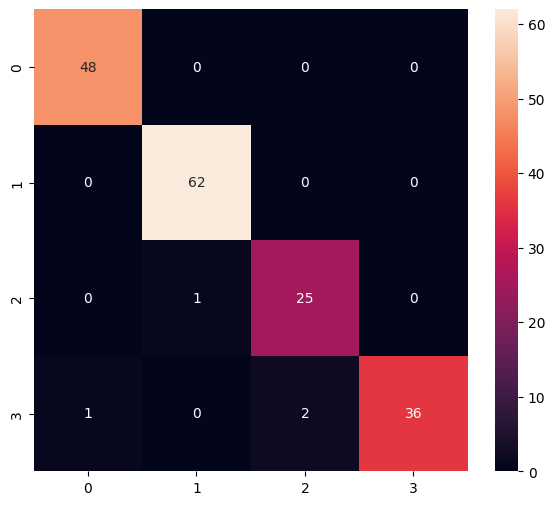

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.98      1.00      0.99        62
           2       0.93      0.96      0.94        26
           3       1.00      0.92      0.96        39

    accuracy                           0.98       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\yupen\AppData\Local\Temp\tmp1cfhzkt5\assets


6544

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 15.6 ms
Wall time: 465 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.7004062  0.26437166 0.00662694 0.02859522]
0
